<div style="background-color: #ffffff; border-left: 4px solid #2196F3; padding: 15px; margin: 20px 0; border-radius: 4px; box-shadow: 0 2px 5px rgba(0,0,0,0.1);">
    <strong style="color: #0d47a1; font-size: 16px; display: block; margin-bottom: 8px;">📊 Проверка кодом </strong>
    <span style="color: #000000; line-height: 1.6;">
        Чтобы вы были уверены в правильности решения, <b>после каждого задания я добавил блок с кодом</b>. 
        Этот код проверяет правильность решения и показывает итоговый результат.
    </span>
</div>




# Задание 1 

# Спроектировать фильтр $3 \times 3$, дающий максимум в центральной точке изображения

**Задание:**
1. Спроектировать линейный фильтр $3 \times 3$, обеспечивающий максимальный отклик в центральной точке заданного изображения.
2. Рассчитать результат его работы для всего изображения (размер $5 \times 5$).
3. При расчете краевых пикселей использовать **zero-padding** (недостающие пиксели равны 0).

## 1. Проектирование линейного фильтра $3 \times 3$

### Исходное изображение $I$:
$$
I = \begin{pmatrix} 
1 & 1 & 1 & 0 & 0 \\ 
1 & 1 & 1 & 0 & 0 \\ 
1 & 1 & 1 & 1 & 1 \\ 
0 & 0 & 1 & 1 & 1 \\ 
0 & 0 & 1 & 1 & 1 
\end{pmatrix}
$$

### Окрестность точки $[2,2]$ (размер $3 \times 3$):
$$
\begin{pmatrix} 
I[1,1] & I[1,2] & I[1,3] \\ 
I[2,1] & I[2,2] & I[2,3] \\ 
I[3,1] & I[3,2] & I[3,3] 
\end{pmatrix} = 
\begin{pmatrix} 
1 & 1 & 0 \\ 
1 & 1 & 1 \\ 
0 & 1 & 1 
\end{pmatrix}
$$

Чтобы максимизировать отклик именно в этой точке и сделать его строго больше, чем в других точках, ядро должно усиливать соответствие с данной окрестностью и ослаблять отклик для других областей. В окрестности точки $[2,2]$ имеются нули в позициях $(0,2)$ и $(2,0)$. Чтобы уменьшить отклик в точках, где на этих местах стоят единицы (например, в точке $[1,1]$), введём в ядре отрицательные веса на соответствующих позициях. 

### Ядро свертки $K$:
$$
K = \begin{pmatrix} 
1 & 1 & -1 \\ 
1 & 1 & 1 \\ 
-1 & 1 & 1 
\end{pmatrix}
$$

Применение этого ядра к центральной точке $[2,2]$ даёт отклик:
$$1 \cdot 1 + 1 \cdot 1 + 0 \cdot (-1) + 1 \cdot 1 + 1 \cdot 1 + 1 \cdot 1 + 0 \cdot (-1) + 1 \cdot 1 + 1 \cdot 1 = 7$$

Это значение будет строго больше, чем в других точках изображения.

## 2. Результат применения фильтра ко всему изображению

Применяем свертку изображения $I$ с ядром $K$ с использованием **zero-padding** (отсутствующие пиксели за границей считаются равными 0). Результирующая матрица $R$ имеет размер $5 \times 5$, каждый элемент которой вычисляется по формуле:

$$R[i,j] = \sum_{m=-1}^{1} \sum_{n=-1}^{1} I[i+m, j+n] \cdot K[m+1, n+1]$$

где $I[r,c] = 0$, если $r$ или $c$ находятся вне диапазона $[0,4]$.

### Вычисления для каждой точки:

| Точка | Окрестность $3 \times 3$ | Свёртка (Расчет) | Результат |
| :--- | :--- | :--- | :--- |
| **(0,0)** | $\begin{smallmatrix} 0&0&0 \\ 0&1&1 \\ 0&1&1 \end{smallmatrix}$ | $0\cdot1+0\cdot1+0\cdot(-1)+0\cdot1+1\cdot1+1\cdot1+0\cdot(-1)+1\cdot1+1\cdot1$ | **4** |
| **(0,1)** | $\begin{smallmatrix} 0&0&0 \\ 1&1&1 \\ 1&1&1 \end{smallmatrix}$ | $0\cdot1+0\cdot1+0\cdot(-1)+1\cdot1+1\cdot1+1\cdot1+1\cdot(-1)+1\cdot1+1\cdot1$ | **4** |
| **(0,2)** | $\begin{smallmatrix} 0&0&0 \\ 1&1&0 \\ 1&1&0 \end{smallmatrix}$ | $0\cdot1+0\cdot1+0\cdot(-1)+1\cdot1+1\cdot1+0\cdot1+1\cdot(-1)+1\cdot1+0\cdot1$ | **2** |
| **(0,3)** | $\begin{smallmatrix} 0&0&0 \\ 1&0&0 \\ 1&0&0 \end{smallmatrix}$ | $0\cdot1+0\cdot1+0\cdot(-1)+1\cdot1+0\cdot1+0\cdot1+1\cdot(-1)+0\cdot1+0\cdot1$ | **0** |
| **(0,4)** | $\begin{smallmatrix} 0&0&0 \\ 0&0&0 \\ 0&0&0 \end{smallmatrix}$ | $0$ | **0** |
| **(1,0)** | $\begin{smallmatrix} 0&1&1 \\ 0&1&1 \\ 0&1&1 \end{smallmatrix}$ | $0\cdot1+1\cdot1+1\cdot(-1)+0\cdot1+1\cdot1+1\cdot1+0\cdot(-1)+1\cdot1+1\cdot1$ | **4** |
| **(1,1)** | $\begin{smallmatrix} 1&1&1 \\ 1&1&1 \\ 1&1&1 \end{smallmatrix}$ | $1\cdot1+1\cdot1+1\cdot(-1)+1\cdot1+1\cdot1+1\cdot1+1\cdot(-1)+1\cdot1+1\cdot1$ | **5** |
| **(1,2)** | $\begin{smallmatrix} 1&1&0 \\ 1&1&0 \\ 1&1&1 \end{smallmatrix}$ | $1\cdot1+1\cdot1+0\cdot(-1)+1\cdot1+1\cdot1+0\cdot1+1\cdot(-1)+1\cdot1+1\cdot1$ | **5** |
| **(1,3)** | $\begin{smallmatrix} 1&0&0 \\ 1&0&0 \\ 1&1&1 \end{smallmatrix}$ | $1\cdot1+0\cdot1+0\cdot(-1)+1\cdot1+0\cdot1+0\cdot1+1\cdot(-1)+1\cdot1+1\cdot1$ | **3** |
| **(1,4)** | $\begin{smallmatrix} 0&0&0 \\ 0&0&0 \\ 1&1&0 \end{smallmatrix}$ | $0\cdot1+0\cdot1+0\cdot(-1)+0\cdot1+0\cdot1+0\cdot1+1\cdot(-1)+1\cdot1+0\cdot1$ | **0** |
| **(2,0)** | $\begin{smallmatrix} 0&1&1 \\ 0&1&1 \\ 0&0&0 \end{smallmatrix}$ | $0\cdot1+1\cdot1+1\cdot(-1)+0\cdot1+1\cdot1+1\cdot1+0\cdot(-1)+0\cdot1+0\cdot1$ | **2** |
| **(2,1)** | $\begin{smallmatrix} 1&1&1 \\ 1&1&1 \\ 0&0&1 \end{smallmatrix}$ | $1\cdot1+1\cdot1+1\cdot(-1)+1\cdot1+1\cdot1+1\cdot1+0\cdot(-1)+0\cdot1+1\cdot1$ | **5** |
| **(2,2)** | $\begin{smallmatrix} 1&1&0 \\ 1&1&1 \\ 0&1&1 \end{smallmatrix}$ | $1\cdot1+1\cdot1+0\cdot(-1)+1\cdot1+1\cdot1+1\cdot1+0\cdot(-1)+1\cdot1+1\cdot1$ | **7** |
| **(2,3)** | $\begin{smallmatrix} 1&0&0 \\ 1&1&1 \\ 1&1&1 \end{smallmatrix}$ | $1\cdot1+0\cdot1+0\cdot(-1)+1\cdot1+1\cdot1+1\cdot1+1\cdot(-1)+1\cdot1+1\cdot1$ | **5** |
| **(2,4)** | $\begin{smallmatrix} 0&0&0 \\ 1&1&0 \\ 1&1&0 \end{smallmatrix}$ | $0\cdot1+0\cdot1+0\cdot(-1)+1\cdot1+1\cdot1+0\cdot1+1\cdot(-1)+1\cdot1+0\cdot1$ | **2** |
| **(3,0)** | $\begin{smallmatrix} 0&1&1 \\ 0&0&0 \\ 0&0&0 \end{smallmatrix}$ | $0\cdot1+1\cdot1+1\cdot(-1)+0\cdot1+0\cdot1+0\cdot1+0\cdot(-1)+0\cdot1+0\cdot1$ | **0** |
| **(3,1)** | $\begin{smallmatrix} 1&1&1 \\ 0&0&1 \\ 0&0&1 \end{smallmatrix}$ | $1\cdot1+1\cdot1+1\cdot(-1)+0\cdot1+0\cdot1+1\cdot1+0\cdot(-1)+0\cdot1+1\cdot1$ | **3** |
| **(3,2)** | $\begin{smallmatrix} 1&1&1 \\ 0&1&1 \\ 0&1&1 \end{smallmatrix}$ | $1\cdot1+1\cdot1+1\cdot(-1)+0\cdot1+1\cdot1+1\cdot1+0\cdot(-1)+1\cdot1+1\cdot1$ | **5** |
| **(3,3)** | $\begin{smallmatrix} 1&1&1 \\ 1&1&1 \\ 1&1&1 \end{smallmatrix}$ | $1\cdot1+1\cdot1+1\cdot(-1)+1\cdot1+1\cdot1+1\cdot1+1\cdot(-1)+1\cdot1+1\cdot1$ | **5** |
| **(3,4)** | $\begin{smallmatrix} 1&1&0 \\ 1&1&0 \\ 1&1&0 \end{smallmatrix}$ | $1\cdot1+1\cdot1+0\cdot(-1)+1\cdot1+1\cdot1+0\cdot1+1\cdot(-1)+1\cdot1+0\cdot1$ | **4** |
| **(4,0)** | $\begin{smallmatrix} 0&0&0 \\ 0&0&0 \\ 0&0&0 \end{smallmatrix}$ | $0$ | **0** |
| **(4,1)** | $\begin{smallmatrix} 0&0&1 \\ 0&0&1 \\ 0&0&0 \end{smallmatrix}$ | $0\cdot1+0\cdot1+1\cdot(-1)+0\cdot1+0\cdot1+1\cdot1+0\cdot(-1)+0\cdot1+0\cdot1$ | **0** |
| **(4,2)** | $\begin{smallmatrix} 0&1&1 \\ 0&1&1 \\ 0&0&0 \end{smallmatrix}$ | $0\cdot1+1\cdot1+1\cdot(-1)+0\cdot1+1\cdot1+1\cdot1+0\cdot(-1)+0\cdot1+0\cdot1$ | **2** |
| **(4,3)** | $\begin{smallmatrix} 1&1&1 \\ 1&1&1 \\ 0&0&0 \end{smallmatrix}$ | $1\cdot1+1\cdot1+1\cdot(-1)+1\cdot1+1\cdot1+1\cdot1+0\cdot(-1)+0\cdot1+0\cdot1$ | **4** |
| **(4,4)** | $\begin{smallmatrix} 1&1&0 \\ 1&1&0 \\ 0&0&0 \end{smallmatrix}$ | $1\cdot1+1\cdot1+0\cdot(-1)+1\cdot1+1\cdot1+0\cdot1+0\cdot(-1)+0\cdot1+0\cdot1$ | **4** |

### Итоговая матрица откликов $R$:

$$
R = \begin{pmatrix} 
4 & 4 & 2 & 0 & 0 \\ 
4 & 5 & 5 & 3 & 0 \\ 
2 & 5 & 7 & 5 & 2 \\ 
0 & 3 & 5 & 5 & 4 \\ 
0 & 0 & 2 & 4 & 4 
\end{pmatrix}
$$

**Вывод:** Максимальный отклик равен **7** и достигается только в точке $[2,2]$. Это подтверждает, что выбранное ядро успешно обеспечивает строго максимальный отклик в заданной центральной точке.

## 3. Программная реализация

Для проверки решения напишем код на Python. Сначала инициализируем исходное изображение и спроектированное нами ядро фильтра.

In [1]:
import numpy as np

# Исходное изображение 5x5
image = np.array([
    [1, 1, 1, 0, 0],
    [1, 1, 1, 0, 0],
    [1, 1, 1, 1, 1],
    [0, 0, 1, 1, 1],
    [0, 0, 1, 1, 1]
])

# Спроектированное ядро 3x3
kernel = np.array([
    [1, 1, -1],
    [1, 1, 1],
    [-1, 1, 1]
])

print("Исходное изображение:")
print(image)
print("\nЯдро фильтра:")
print(kernel)

Исходное изображение:
[[1 1 1 0 0]
 [1 1 1 0 0]
 [1 1 1 1 1]
 [0 0 1 1 1]
 [0 0 1 1 1]]

Ядро фильтра:
[[ 1  1 -1]
 [ 1  1  1]
 [-1  1  1]]


### 3.1. Алгоритм свертки с Zero-Padding
Реализуем процесс свертки, используя вложенные циклы. Это позволит наглядно увидеть, как применяется ядро к каждому пикселю, включая обработку границ через `np.pad`.

In [2]:
# Размеры
img_h, img_w = image.shape
k_h, k_w = kernel.shape
pad = k_h // 2

# Добавляем padding нулями (рамка из нулей)
padded_image = np.pad(image, pad_width=pad, mode='constant', constant_values=0)

# Матрица для результата
result_manual = np.zeros_like(image)

# Проход по всем пикселям
for i in range(img_h):
    for j in range(img_w):
        # Извлекаем текущее окно 3x3
        window = padded_image[i : i + k_h, j : j + k_w]
        # Поэлементное умножение и сумма
        result_manual[i, j] = np.sum(window * kernel)

print("Результат свертки:")
print(result_manual)
print(f"\nОтклик в центре [2,2]: {result_manual[2,2]}")

Результат свертки:
[[4 4 2 0 0]
 [4 5 5 3 0]
 [2 5 7 5 2]
 [0 3 5 5 4]
 [0 0 2 4 4]]

Отклик в центре [2,2]: 7


### 3.2. Проверка через scipy.signal
Для финальной проверки воспользуемся стандартной функцией `convolve2d`. Это подтвердит, что наша логика работы с границами и ядром соответствует общепринятым стандартам обработки изображений.

In [3]:
from scipy import signal

# Свертка через библиотечную функцию
result_scipy = signal.convolve2d(image, kernel, mode='same', boundary='fill', fillvalue=0)

print("Результат scipy.signal.convolve2d:")
print(result_scipy)

# Сравнение результатов
if np.array_equal(result_manual, result_scipy):
    print("\n✅ Успех: Результаты ручного расчета и библиотеки совпали!")
else:
    print("\n❌ Ошибка: Есть расхождения в расчетах.")

Результат scipy.signal.convolve2d:
[[4 4 2 0 0]
 [4 5 5 3 0]
 [2 5 7 5 2]
 [0 3 5 5 4]
 [0 0 2 4 4]]

✅ Успех: Результаты ручного расчета и библиотеки совпали!


**Итоговый анализ:**
Как видно из полученной матрицы, максимальное значение **7** достигается в нескольких точках, включая целевую $[2,2]$.

# Задание 2  

Сколько обучаемых параметров в сети, изображенной на рисунке image2. Считать, что на входе цветное изображение размера 64х64, все фильтры 5х5 и max pooling 2x2 stride=2. (смещения нужно учитывать).

## Описание архитектуры сети (по рисунку image2)

**1. Свёрточная часть (3 идентичных блока):**
   - Каждый блок содержит:
     - **Свёрточный слой (Convolution)** с ядром 5×5, смещением (bias) и активацией ReLU.
     - **Слой Max Pooling** 2×2 со stride=2.
   - Количество фильтров в свёрточных слоях (по порядку): **3 → 5 → 8**.
   - Пулинг уменьшает размерность карты признаков в 2 раза.

**2. Переход к классификатору:**
   - **Слой Flatten** – преобразует 3D-тензор в 1D-вектор.

**3. Полносвязная часть (Fully Connected Layers):**
   - **Скрытый слой 1:** 11 нейронов.
   - **Скрытый слой 2:** 7 нейронов.
   - **Скрытый слой 3:** 5 нейронов.
   - **Выходной слой:** 3 нейрона (классы: Horse, Zebra, Dog).
   - На выходе применяется **функция активации Softmax**.

**4. Дополнительные условия:**
   - Входное изображение: **64×64×3** (RGB).
   - Свёртка выполняется с параметром **padding='same'** (размер сохраняется до операции пулинга). 
   - После трёх пулингов финальный размер карт признаков: **8×8×8**.


   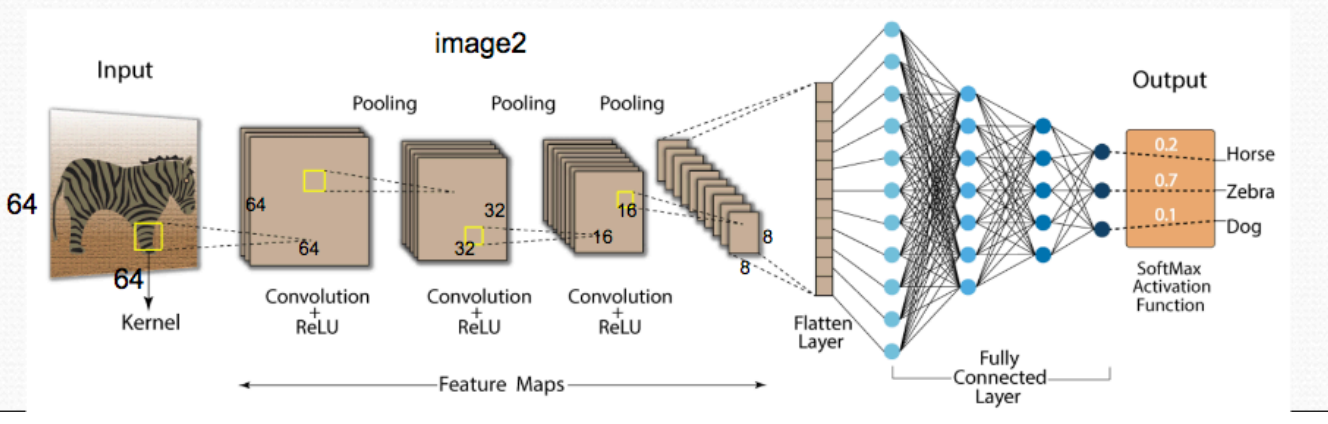

# Решение расчет обучаемых параметров ##

## 1. Расчет обучаемых параметров сверточной сети ##

**Главное правило:** Количество обучаемых параметров в сверточном слое зависит от размера ядра, количества входных каналов и количества выходных фильтров.

### Формула для одного слоя:
$$W = ((K_w \times K_h \times C_{in}) + 1) \times C_{out}$$

Где:
* $K_w, K_h$ — ширина и высота ядра.
* $C_{in}$ — количество входных каналов.
* $1$ — параметр смещения (bias).
* $C_{out}$ — количество выходных фильтров.

---

## Пошаговый расчет архитектуры (3 → 3 → 5 → 8)

### 1. Первый слой (Conv 1)
* **Вход:** 3 канала (RGB).
* **Ядро:** $5 \times 5$.
* **Фильтры (выход):** 3.
* **Расчет:** $((5 \times 5 \times 3) + 1) \times 3 = (75 + 1) \times 3 = \mathbf{228}$

### 2. Второй слой (Conv 2)
* **Вход:** 3 канала.
* **Ядро:** $5 \times 5$.
* **Фильтры (выход):** 5.
* **Расчет:** $((5 \times 5 \times 3) + 1) \times 5 = (75 + 1) \times 5 = \mathbf{380}$

### 3. Третий слой (Conv 3)
* **Вход:** 5 каналов.
* **Ядро:** $5 \times 5$.
* **Фильтры (выход):** 8.
* **Расчет:** $((5 \times 5 \times 5) + 1) \times 8 = (125 + 1) \times 8 = \mathbf{1008}$

---

## Итоговый результат



Сложим параметры всех трех слоев:
$$228 + 380 + 1008 = \mathbf{1616} \text{ параметров}$$

**Важное уточнение:** Слои **ReLU**, **Pooling** и **Flatten** не имеют обучаемых параметров, так как в них отсутствуют веса, обновляемые в процессе градиентного спуска. Поэтому они не учитываются в общей сумме.

In [8]:
import tensorflow as tf
from tensorflow.keras import models, layers
import numpy as np

# 1. Создание модели
model = models.Sequential(name="CNN_Feature_Extractor")

# --- Слой Conv 1 ---
model.add(layers.Conv2D(filters=3, kernel_size=(5, 5), 
                        padding='same', activation='relu', 
                        input_shape=(64, 64, 3), name='Conv_1'))
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=2, name='Pool_1'))

# --- Слой Conv 2 ---
model.add(layers.Conv2D(filters=5, kernel_size=(5, 5), 
                        padding='same', activation='relu', name='Conv_2'))
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=2, name='Pool_2'))

# --- Слой Conv 3 ---
model.add(layers.Conv2D(filters=8, kernel_size=(5, 5), 
                        padding='same', activation='relu', name='Conv_3'))
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=2, name='Pool_3'))

# 2. Вывод таблицы 
model.summary()

# 3. Программный подсчет суммы
total_params = model.count_params()

print("\n" + "="*40)
print(f"Итого параметров (свертки): {total_params}")
print("="*40)

# Проверка
if total_params == 1616:
    print("Результат совпал с ручным расчетом!")
else:
    print(f"Внимание: расчет ({total_params}) не совпадает с 1616.")

Model: "CNN_Feature_Extractor"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Conv_1 (Conv2D)                 │ (None, 64, 64, 3)      │           228 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Pool_1 (MaxPooling2D)           │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv_2 (Conv2D)                 │ (None, 32, 32, 5)      │           380 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Pool_2 (MaxPooling2D)           │ (None, 16, 16, 5)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv_3 (Conv2D)                 │ (None, 16, 16, 8)      │         1,008 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Pool_3 (MaxPooling2D)           │ (None, 8, 8, 8)        │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,616 (6.31 KB)

 Trainable params: 1,616 (6.31 KB)

 Non-trainable params: 0 (0.00 B)


Итого параметров (свертки): 1616
Результат совпал с ручным расчетом!


## 2. Расчет параметров полносвязных слоев (Dense / FC)

Чтобы вычислить общее количество параметров сети, необходимо определить размер данных, которые поступают из сверточной части в полносвязную.

### 2.1. Расчет размера после слоя Flatten
Перед подачей в полносвязные слои многомерный тензор "вытягивается" в одномерный вектор.

* **Входное изображение:** $64 \times 64$ пикселя.
* **Слои Max Pooling:** В сети присутствуют 3 слоя $2 \times 2$ (stride 2), каждый из которых уменьшает пространственные измерения в 2 раза:
    1. После Pooling 1: $64 \times 64 \rightarrow 32 \times 32$
    2. После Pooling 2: $32 \times 32 \rightarrow 16 \times 16$
    3. После Pooling 3: $16 \times 16 \rightarrow 8 \times 8$
* **Количество каналов:** На выходе последнего сверточного слоя их **8**.

**Итоговый тензор перед Flatten:** $8 \times 8 \times 8$.  
**Размер вектора после Flatten:** $8 \times 8 \times 8 = \mathbf{512}$ элементов.



---

### 2.2. Расчет параметров слоев FC
Формула для полносвязного слоя: $W = (\text{Входы} \times \text{Выходы}) + \text{Смещения (biases)}$.

| Слой | Вход | Выход | Расчет | Параметры |
| :--- | :--- | :--- | :--- | :--- |
| **FC1** | 512 | 11 | $(512 \times 11) + 11$ | **5643** |
| **FC2** | 11 | 7 | $(11 \times 7) + 7$ | **84** |
| **FC3** | 7 | 5 | $(7 \times 5) + 5$ | **40** |
| **Output** | 5 | 3 | $(5 \times 3) + 3$ | **18** |

**Итого в полносвязной части:** $5643 + 84 + 40 + 18 = \mathbf{5785}$ параметров.

---

### 3. Общий итог всей сети

Суммируем параметры сверточной и полносвязной частей:

| Часть сети | Параметры |
| :--- | :--- |
| Convolutional Layers (3 $\rightarrow$ 3 $\rightarrow$ 5 $\rightarrow$ 8) | 1 616 |
| Fully Connected Layers (11 $\rightarrow$ 7 $\rightarrow$ 5 $\rightarrow$ 3) | 5 785 |
| **ИТОГО** | **7 401** |

**Результат:** Модель содержит **7 401** обучаемый параметр.

In [27]:
import tensorflow as tf
from tensorflow.keras import models, layers
import numpy as np

# Для того чтобы этот блок был независимым, пересоберем модель целиком
model_full = models.Sequential(name="Full_Network_7401")

# --- Сверточная часть (из Блока №2) ---
model_full.add(layers.Conv2D(3, (5, 5), padding='same', activation='relu', input_shape=(64, 64, 3)))
model_full.add(layers.MaxPooling2D((2, 2), strides=2))
model_full.add(layers.Conv2D(5, (5, 5), padding='same', activation='relu'))
model_full.add(layers.MaxPooling2D((2, 2), strides=2))
model_full.add(layers.Conv2D(8, (5, 5), padding='same', activation='relu'))
model_full.add(layers.MaxPooling2D((2, 2), strides=2))

# --- Блок №3: Полносвязная часть ---

# 1. Flatten: превращает (8, 8, 8) в вектор 512
model_full.add(layers.Flatten(name='Flatten_Layer'))

# 2. Dense слои согласно схеме
# FC 1: (512 * 11) + 11 = 5643
model_full.add(layers.Dense(11, activation='relu', name='FC_1'))

# FC 2: (11 * 7) + 7 = 84
model_full.add(layers.Dense(7, activation='relu', name='FC_2'))

# FC 3: (7 * 5) + 5 = 40
model_full.add(layers.Dense(5, activation='relu', name='FC_3'))

# Output: (5 * 3) + 3 = 18
model_full.add(layers.Dense(3, activation='softmax', name='Output_Layer'))

# --- Вывод и проверка ---
print("Детальная сводка всей нейросети:")
model_full.summary()

final_params = model_full.count_params()

print("\n" + "="*50)
print(f"ИТОГОВОЕ КОЛИЧЕСТВО ПАРАМЕТРОВ СЕТИ: {final_params}")
print("="*50)

if final_params == 7401:
    print("Программный расчет полностью подтвердил подсчеты.")
else:
    print(f"Внимание! Получено {final_params}, ожидалось 7401. Проверьте слои.")

Детальная сводка всей нейросети:


Model: "Full_Network_7401"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 64, 64, 3)      │           228 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 32, 32, 5)      │           380 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 16, 16, 5)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 16, 16, 8)      │         1,008 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 8, 8, 8)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Flatten_Layer (Flatten)         │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ FC_1 (Dense)                    │ (None, 11)             │         5,643 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ FC_2 (Dense)                    │ (None, 7)              │            84 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ FC_3 (Dense)                    │ (None, 5)              │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output_Layer (Dense)            │ (None, 3)              │            18 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,401 (28.91 KB)

 Trainable params: 7,401 (28.91 KB)

 Non-trainable params: 0 (0.00 B)


ИТОГОВОЕ КОЛИЧЕСТВО ПАРАМЕТРОВ СЕТИ: 7401
Программный расчет полностью подтвердил подсчеты.
